# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [67]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [68]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [70]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [71]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [72]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [73]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [74]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [75]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [76]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [77]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [78]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [79]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [80]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [81]:
data.duplicated().sum()

71

In [82]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [83]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [84]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [85]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [86]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [87]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [89]:
import seaborn as sns

In [1]:
debt_vs_parameter_barplot('children', 'children') 

NameError: name 'debt_vs_parameter_barplot' is not defined

In [92]:
#Функция принимает наименование столбца, который будет затем сравниваться со столбцом debt
#и параметр, который отвечает, по какому столбцу будет отсортирован результат
#Функция возвращает таблицу с уникальными данными запрашиваемого параметра, количество всех клиентов в разрезе параметра,
#количество клиентов с задолженностью по кредиту, и отношение клиентов с задолженностью ко всем клиентам
def new_pivot_debt_vs_parameter_barplot(parameter, sort_order=''):
    #Обработка возможных ошибок c типом параметра
    try:
        
        #Проверка, что введенный parameter соответствует наименованию одного из столбцов таблицы data
        if parameter in data.columns:
            
            #Создаю сводную таблицу с данными об общем кол-ве клиентов, о кол-ве клиентов с просрочкой, о проценте клиентов с просрочкой в каждой категории 
            parameter_vs_debt = pd.pivot_table(data, values='debt', index=parameter, aggfunc=['count', 'sum', 'mean'])
            
            #Введенное значение sort_order нужно немного преобразовать для дальнейшей сортировки
            sort_order = (sort_order, 'debt')
            #Если sort_order введен, то таблица отсортируется по введенному параметру, а если не введен, то
            #сортировка по-умолчанию будет произведена по parameter в сводной таблице
            if sort_order != ('', 'debt'):
                if sort_order in parameter_vs_debt.columns:
                    parameter_vs_debt = parameter_vs_debt.sort_values(by=sort_order)
                else: print('Такой параметр отсутствует в таблице parameter_vs_debt') 
            
            #Вывод заполненной таблицы на экран
            print('Процент клиентов с задолженностью по кредитам в разрезе значений столбца ', parameter)
            print(parameter_vs_debt)
            #Вывод гистограммы на экран
            print('Доля просрочек по кредитам по категориям ', parameter)
            bar = sns.barplot(data = parameter_vs_debt, x = parameter_vs_debt.index, y = ('mean', 'debt'))
            bar.set(ylabel = 'Доля просрочек по кредитам')
            
            #Красивые подписи к осям гистограммы. Если будет какой-то новый параметр, то подписи оси х не поменяются 
            if parameter == 'children':
                bar.set(xlabel = 'Количество детей')
            elif parameter == 'family_status':
                bar.set(xlabel = 'Семейное положение')
                bar.set_xticklabels(parameter_vs_debt.index, rotation=10)
            elif parameter == 'total_income_category':
                bar.set(xlabel = 'Категория дохода')
                labels = ['1000001 и выше', '200001–1000000', '50001–200000', '30001–50000', '0–30000']                
                bar.set_xticklabels(labels, rotation=10)
            elif parameter == 'purpose_category':
                bar.set(xlabel = 'Цель кредита')
                bar.set_xticklabels(parameter_vs_debt.index, rotation=10)
            
        else: print('Такой параметр отсутствует в таблице data') 
    except: print('Ошибка в типе параметра')

Процент клиентов с задолженностью по кредитам в разрезе значений столбца  children
          count   sum      mean
           debt  debt      debt
children                       
5             9     0  0.000000
4            41     4  0.097561
3           330    27  0.081818
2          2052   194  0.094542
1          4808   444  0.092346
0         14091  1063  0.075438
Доля просрочек по кредитам по категориям  children


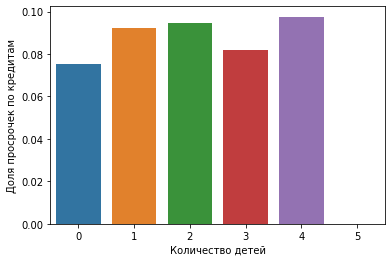

In [93]:
new_pivot_debt_vs_parameter_barplot('children', 'sum')

**Вывод:** 
Гипотеза подтвердилась: чем больше у клиента детей, тем с большей вероятностью клиент может допустить задолженность по кредиту. Параметр можно принять для дальнейшего построения скоринговой модели.

На гистограмме отражено увеличение процента клиентов с задолженностью по кредиту в зависимости от увеличения количества детей. Особенно хороша видна зависимость на примере клиентов с 2-мя детьми, 1-м ребенком и без детей. "Провал" процента клиентов с задолженностью для клиентов с 3-мя детьми и отсутствие клиентов с задолженностью в группе клиентов с 5-ю детьми объясняется тем, что эти группы малочисленны, и поэтому появление (или отсутствие) каждого нового клиента с задолженностью добавит существенный прирост (убыль) итоговому проценту.

Гипотеза также объяснима с точки зрения логики: дети обычно находятся на иждевении у родителей, что создает дополнительную финансовую нагрузку на родителей, которая может привести к задолженности по кредиту.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

Процент клиентов с задолженностью по кредитам в разрезе значений столбца  family_status
                       count  sum      mean
                        debt debt      debt
family_status                              
вдовец / вдова           951   63  0.066246
в разводе               1189   84  0.070648
женат / замужем        12261  927  0.075606
гражданский брак        4134  385  0.093130
Не женат / не замужем   2796  273  0.097639
Доля просрочек по кредитам по категориям  family_status


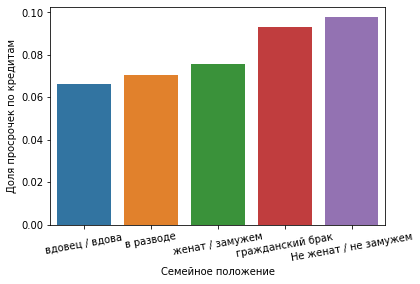

In [96]:
new_pivot_debt_vs_parameter_barplot('family_status', 'mean') 

**Вывод:** 
Требуется дополнительное исследование гипотезы с расширением списка исследуемых параметров.

В ходе исследования выявлено, что процент клиентов с задолженностью выше для клиентов, не состоящих в браке или состоящих в гражданском браке. Тем не менее, гипотезу о зависимости вероятности задолженности по кредиту от семейного положения не стоит принимать в работу без дополнительных корректировок, так как с точки зрения логики не удается объяснить данную зависимость не опираясь на прочие параметры, описывающие клиента. Между процентом клиентов с задолженностью и семейным положением может и не быть прямой зависимости, но каждый из этих параметров может зависеть от общего для них третьего параметра.

Так, например, более низкий процент клиентов с задолженностью среди людей, состоящих в браке, может объясняться наличием созаемщика (мужа или жены), а низкий процент клиентов задолженностью среди людей в разводе или потерявших супруга может объясняться возрастом, доходом (который также может зависеть от возраста) или совместно нажитым имуществом.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Процент клиентов с задолженностью по кредитам в разрезе значений столбца  total_income_category
                       count   sum      mean
                        debt  debt      debt
total_income_category                       
A                         25     2  0.080000
B                       5014   354  0.070602
C                      15921  1353  0.084982
D                        349    21  0.060172
E                         22     2  0.090909
Доля просрочек по кредитам по категориям  total_income_category


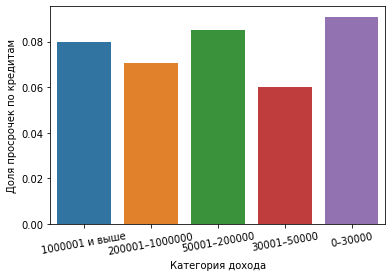

In [97]:
new_pivot_debt_vs_parameter_barplot('total_income_category') 

**Вывод:** 
Гипотеза подтвердилась: чем больше у клиента доход, тем меньше вероятность появления у него задолженности по кредиту.

Вывод сделан на основе данных по группам B и C. Клиенты из группы В, обладающие более высоким доходом, допускают меньшую вероятность появления задолженности по кредиту, чем клиенты из группы С. Группы A, D, E являются малочисленными, поэтому на основе расчета по данным группам нельзя сделать полноценный вывод. Тем не менее, малочисленность данных групп объяснима: клиенты с доходом категории "А" реже обращаются за кредитом в связи с большим доходом, и в случае обращения могут запрашивать большие суммы. А клиентам категории D или E могут отказывать в кредите


#### 3.4 Как разные цели кредита влияют на его возврат в срок?

Процент клиентов с задолженностью по кредитам в разрезе значений столбца  purpose_category
                          count  sum      mean
                           debt debt      debt
purpose_category                              
проведение свадьбы         2313  183  0.079118
получение образования      3988  369  0.092528
операции с автомобилем     4279  400  0.093480
операции с недвижимостью  10751  780  0.072551
Доля просрочек по кредитам по категориям  purpose_category


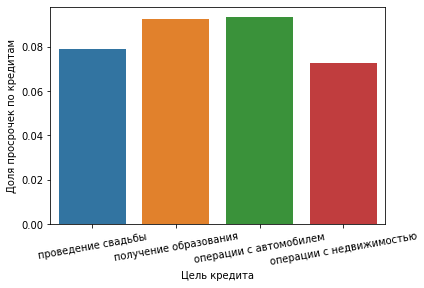

In [98]:
new_pivot_debt_vs_parameter_barplot('purpose_category', 'count') 

**Вывод:** 
Требуется дополнительное исследование гипотезы с расширением списка исследуемых параметров. Тем не менее, параметр "цель кредита" можно выделять как один из параметров будущей скоринговой модели, в который будут сгруппированы другие параметры (возраст, доход, сумма кредита и т.д.), на основе которых будет рассчитываться вероятность возврата кредита в срок.

На гистограмме видно, что процент по задолженности ниже для кредитов с целью "проведение свадьбы" и "операции с недвижимостью", но это может объясняться не столько целью, сколько с вероятным наличием второго созаемщика, который может помощь заемщику в случае, если он не сможет оплатить кредит. Также, в случае проведения свадьбы, на низкую вероятность задолженности по кредиту может влиять относительно небольшая величина долга. 

Высокий процент задолженности по кредиту с целью получения образования может быть связан с молодым возрастом заемщика и связанным с этим низким доходом.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* 

В исходных данных присутствовали пропуски в данных по количеству дней трудового стажа и среднему доходу. Существуют следующие возможные причины пропусков в исходных данных:
1. Отсутствие данных о трудовом стаже для групп "безработный" и "пенсионер". 
2. Отказ клиентов в предоставлении соответствующей информации.
3. Отсутствие соответствующих полей для ввода в форме заявки на выдачу кредита.
4. Ошибка выгрузки, в связи с чем данные могли быть недовыгружены, или в выгрузку могли попасть клиенты, которые не брали кредит (по клиентам с депозитами обычно запрашивается меньшее количество информации).
5. Ошибка разработчиков - они могли написать метод, который затер данные.
6. Клиент мог уже закрыть кредит, в связи с чем у банка через какое-то время, предусмотренное в соглашении, могло пропасть право на обработку персональных данных о трудовом стаже. Либо клиент сам мог отозвать право на обработку ПДн.
7. Кредит, например образовательный, мог оформить ребенок до 16 лет. Он еще не может быть признан безработным, и ему еще не была заведена трудовая книжка.



#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* 

Использование медианы идеально для данных, которые описываются нормальным распределением, так как медиана будет отражать среднее значение без учета выбросов.

Докажем преимущества медианы на примере недостатков альтернативных случаев:

1. Игнорирование пропущенных значений. Если не заполнить пропуски данными, то это может исказить общую статистику, так как количественные переменные будут не учтены в результате, а качественные - учтены. 
2. Удаление строк с пропущенными значениями. Тоже вызовет искажение общей статистики, так как исключение качественных переменных  может вызвать некорректное восприятие о численности их категорий.
3. Заполнение пропусков средними значениями. Может быть хорошим вариантом, но при наличии выбросов в данных (слишком больших или слишком маленьких значений) приведет к искаженному результату.
4. Использование статистических методов. Может выдавать более корректных результат, но при этом потребовать больше времени для обработки


### Шаг 4: общий вывод.

По результатам исследования надежности заемщиков было выявлено, что для построения скоринговой модели можно использовать данные о количестве детей и данные о доходе заемщика. Данные о цели кредита можно использовать как один из параметров будущей скоринговой модели, в который будут сгруппированы другие параметры (возраст, доход, сумма кредита и т.д.), на основе которых будет рассчитываться вероятность возврата кредита в срок. Параметр "семейное положение" не имеет прямого влияния на возврат кредита в срок.